# AMBULATORY and EMERGENCY DEPARTMENT PATIENT DATA
I have 8 different csv files that contains my data. Instead of reading each of the files independently, I decided to put them in one folder and read them all at once, while concatenating.

By using the glob.glob function, I was able to use list comprehension and make this import pretty seamless.

glob.glob('data*.csv') - returns List[str]  
pd.read_csv(f) - returns pd.DataFrame()  
for f in glob.glob() - returns a List[DataFrames]  
pd.concat() - returns one pd.DataFrame()

In [1]:
import pandas as pd
import numpy as np
import glob

cols = ['SYS_RECID', 'YEAR', 'QTR', 'FACLNBR', 'MCARE_NBR', 'TYPE_SERV',
       'SERV_LOC', 'PRO_CODE', 'FAC_REGION', 'FAC_COUNTY', 'ETHNICITY', 'RACE',
       'SEX', 'AGE', 'LOSDAYS', 'WEEKDAY', 'ZIPCODE', 'PTCOUNTY', 'PTSTATE',
       'PTCOUNTRY', 'ADMSRC', 'HR_ARRIVAL', 'EDHR_DISCH', 'PT_STATUS', 'PAYER',
       'REASON_CDE', 'EVALCODE1', 'EVALCODE2', 'EVALCODE3', 'EVALCODE4',
       'EVALCODE5', 'OTHCPT1', 'OTHCPT2', 'OTHCPT3', 'OTHCPT4', 'OTHCPT5',
       'OTHCPT6', 'OTHCPT7', 'OTHCPT8', 'OTHCPT9', 'OTHCPT10', 'OTHCPT11',
       'OTHCPT12', 'OTHCPT13', 'OTHCPT14', 'OTHCPT15', 'OTHCPT16', 'OTHCPT17',
       'OTHCPT18', 'OTHCPT19', 'OTHCPT20', 'OTHCPT21', 'OTHCPT22', 'OTHCPT23',
       'OTHCPT24', 'OTHCPT25', 'OTHCPT26', 'OTHCPT27', 'OTHCPT28', 'OTHCPT29',
       'OTHCPT30', 'PRINDIAG', 'OTHDIAG1', 'OTHDIAG2', 'OTHDIAG3', 'OTHDIAG4',
       'OTHDIAG5', 'OTHDIAG6', 'OTHDIAG7', 'OTHDIAG8', 'OTHDIAG9', 'ECMORB1',
       'ECMORB2', 'ECMORB3', 'ATTEN_PHYI', 'ATTEN_PHYN', 'OPER_PHYID',
       'OPER_PHYNP', 'OTHOPER_PH', 'OTHOPER__A', 'PHARMCHGS', 'MEDCHGS',
       'LABCHGS', 'RADCHGS', 'CARDIOCHGS', 'OPRMCHGS', 'ANESCHGS', 'RECOVCHGS',
       'ERCHGS', 'TRAUMACHGS', 'OBSERCHGS', 'GASTROCHGS', 'LITHOCHGS',
       'OTHCHGS', 'TCHGS']

unneeded_data = ['EVALCODE2','EVALCODE3','EVALCODE4','EVALCODE5','OTHCPT6','OTHCPT7','OTHCPT8',
                'OTHCPT9','OTHCPT10','OTHCPT11','OTHCPT12','OTHCPT13', 'OTHCPT14',
                'OTHCPT15', 'OTHCPT16', 'OTHCPT17', 'OTHCPT18','OTHCPT19', 'OTHCPT20',
                'OTHCPT21', 'OTHCPT22', 'OTHCPT23', 'OTHCPT24','OTHCPT25', 'OTHCPT26',
                'OTHCPT27', 'OTHCPT28', 'OTHCPT29', 'OTHCPT30','OTHDIAG6','OTHDIAG7',
                'OTHDIAG8','OTHDIAG9','OTHOPER_PH','OTHOPER__A','PHARMCHGS', 'MEDCHGS', 'LABCHGS',
                'RADCHGS', 'CARDIOCHGS', 'OPRMCHGS', 'ANESCHGS', 'RECOVCHGS', 'ERCHGS',
                'TRAUMACHGS', 'OBSERCHGS', 'GASTROCHGS', 'LITHOCHGS', 'OTHCHGS','TCHGS','OPER_PHYID',
                 'OPER_PHYNP','PRINPROC','OTHPROC1','OTHPROC2','OTHPROC3','OTHPROC4']

#These are the opioid codes that we are most interested in. We will filter the [REASON_CDE] column by these specific codes
opioid_dx = ('F11.10','F11.120','F11.121',
'F11.122','F11.129','F11.14','F11.150','F11.151','F11.159','F11.181','F11.182','F11.188',
'F11.19','F11.20','F11.220','F11.221','F11.222','F11.229','F11.23','F11.24','F11.250',
'F11.251','F11.259','F11.281','F11.282','F11.288','F11.29','F11.90','F11.920','F11.921',
'F11.922','F11.929','F11.93','F11.94','F11.950','F11.951','F11.959','F11.981','F11.982',
'F11.988','F11.99','T40.0X1A','T40.0X1D','T40.0X1S','T40.0X4A','T40.0X4D','T40.0X4S',
'T40.0X5A','T40.0X5D','T40.0X5S','T40.1X1A','T40.1X1D','T40.1X1S','T40.1X4A','T40.1X4D',
'T40.1X4S','T40.2X1A','T40.2X1D','T40.2X1S','T40.2X4A','T40.2X4D','T40.2X4S','T40.2X5A',
'T40.2X5D','T40.2X5S','T40.3X1A','T40.3X1D','T40.3X1S','T40.3X4A','T40.3X4D','T40.3X4S',
'T40.3X5A','T40.3X5D','T40.3X5S','T40.4X1A','T40.4X1D','T40.4X1S','T40.4X4A','T40.4X4D',
'T40.4X4S','T40.4X5A','T40.4X5D','T40.4X5S','T40.601A','T40.601D','T40.601S','T40.604A',
'T40.604D','T40.604S','T40.605A','T40.605D','T40.605S','T40.691A','T40.691D','T40.691S',
'T40.694A','T40.694D','T40.694S','T40.695A','T40.695D','T40.695S','T40.0X2A','T40.0X2D',
'T40.0X2S','T40.0X3A','T40.0X3D','T40.0X3S','T40.1X2A','T40.1X2D','T40.1X2S','T40.1X3A',
'T40.1X3D','T40.1X3S','T40.2X2A','T40.2X2D','T40.2X2S','T40.2X3A','T40.2X3D','T40.2X3S',
'T40.3X2A','T40.3X2D','T40.3X2S','T40.3X3A','T40.3X3D','T40.3X3S','T40.4X2A','T40.4X2D',
'T40.4X2S','T40.4X3A','T40.4X3D','T40.4X3S','T40.602A','T40.602D','T40.602S','T40.603A',
'T40.603D','T40.603S','T40.692A','T40.692D','T40.692S','T40.693A','T40.693D','T40.693S') 


#df = pd.concat([pd.read_csv(f , dtype= object) for f in glob.glob('/Users/EricJC/Desktop/Data/*.csv')], ignore_index = True, sort=False)
df = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/EricJC/Desktop/Data/*.csv')], ignore_index = True, sort=False)
df = df.drop(unneeded_data, axis = 1)
df1 = df.loc[df['REASON_CDE'].isin(opioid_dx)]
print(df.head())
df1.head()

/Users/EricJC/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6,20,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,70,73,76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/EricJC/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6,20,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,70,73,78) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/EricJC/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (6,20,26,27,28,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,70,73,74,75,76,77,78,83) have mixed types. Specify dtype option on import o

   SYS_RECID  YEAR  QTR  FACLNBR  MCARE_NBR  TYPE_SERV SERV_LOC  PRO_CODE  \
0  100140850  2018    1   100029     100029          2      NaN        23   
1  100140851  2018    1   100029     100029          2      NaN        23   
2  100140852  2018    1   100029     100029          2      NaN        23   
3  100140853  2018    1   100029     100029          2      NaN        23   
4  100140854  2018    1   100029     100029          2      NaN        23   

   FAC_REGION  FAC_COUNTY  ...  OTHDIAG1  OTHDIAG2 OTHDIAG3  OTHDIAG4  \
0          11          13  ...       NaN       NaN      NaN       NaN   
1          11          13  ...     N39.0       NaN      NaN       NaN   
2          11          13  ...   Z00.129       NaN      NaN       NaN   
3          11          13  ...       I10    M75.82    M77.8       NaN   
4          11          13  ...  T14.90XD       NaN      NaN       NaN   

   OTHDIAG5   ECMORB1  ECMORB2  ECMORB3 ATTEN_PHYI  ATTEN_PHYN  
0       NaN  W50.3XXA   Y92.69   

,SYS_RECID,YEAR,QTR,FACLNBR,MCARE_NBR,TYPE_SERV,SERV_LOC,PRO_CODE,FAC_REGION,FAC_COUNTY,...,OTHDIAG1,OTHDIAG2,OTHDIAG3,OTHDIAG4,OTHDIAG5,ECMORB1,ECMORB2,ECMORB3,ATTEN_PHYI,ATTEN_PHYN
131,100140791,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,Y92.9,NaN,NaN,ME124985,1336497890
331,100140916,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,Y92.009,NaN,NaN,ME131402,1164835443
544,100141129,2018,1,100029,100029,2,NaN,23,11,13,...,F11.10,F19.10,F20.9,M06.9,NaN,Y92.009,NaN,NaN,OS7598,1902802713
701,100141551,2018,1,100029,100029,2,NaN,23,11,13,...,T40.5X1A,F14.10,F18.10,NaN,NaN,NaN,NaN,NaN,ME107380,1639495245
1877,100142462,2018,1,100029,100029,2,NaN,23,11,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS7598,1902802713


In [3]:
#important to see where my missing values are
print(df.isna().sum())
df1.isna().sum()

SYS_RECID           0
YEAR                0
QTR                 0
FACLNBR             0
MCARE_NBR           0
TYPE_SERV           0
SERV_LOC      7323984
PRO_CODE            0
FAC_REGION          0
FAC_COUNTY          0
ETHNICITY           0
RACE                0
SEX                 0
AGE                 0
LOSDAYS             0
WEEKDAY             0
ZIPCODE             0
PTCOUNTY            0
PTSTATE             0
PTCOUNTRY           7
ADMSRC              0
HR_ARRIVAL          0
EDHR_DISCH          0
PT_STATUS           0
PAYER               0
REASON_CDE     337663
EVALCODE1          13
OTHCPT1       1463388
OTHCPT2       2546423
OTHCPT3       3379984
OTHCPT4       3977988
OTHCPT5       4425307
PRINDIAG         3077
OTHDIAG1      2250175
OTHDIAG2      4121271
OTHDIAG3      5362508
OTHDIAG4      6163765
OTHDIAG5      6694636
ECMORB1       6277089
ECMORB2       7291285
ECMORB3       7837626
ATTEN_PHYI      21763
ATTEN_PHYN          0
dtype: int64


SYS_RECID         0
YEAR              0
QTR               0
FACLNBR           0
MCARE_NBR         0
TYPE_SERV         0
SERV_LOC      13699
PRO_CODE          0
FAC_REGION        0
FAC_COUNTY        0
ETHNICITY         0
RACE              0
SEX               0
AGE               0
LOSDAYS           0
WEEKDAY           0
ZIPCODE           0
PTCOUNTY          0
PTSTATE           0
PTCOUNTRY         0
ADMSRC            0
HR_ARRIVAL        0
EDHR_DISCH        0
PT_STATUS         0
PAYER             0
REASON_CDE        0
EVALCODE1         0
OTHCPT1        4296
OTHCPT2        5382
OTHCPT3        6208
OTHCPT4        6875
OTHCPT5        7550
PRINDIAG          1
OTHDIAG1       3031
OTHDIAG2       7107
OTHDIAG3       9847
OTHDIAG4      11550
OTHDIAG5      12571
ECMORB1       12443
ECMORB2       14333
ECMORB3       14437
ATTEN_PHYI       55
ATTEN_PHYN        0
dtype: int64

In [19]:
print(df.shape)
df1.shape

(8000000, 43)


(14468, 43)

In [23]:
df_stack = df.stack()
df_stack.head(100)

0  SYS_RECID      100140850
   YEAR                2018
   QTR                    1
   FACLNBR           100029
   MCARE_NBR         100029
   TYPE_SERV              2
   PRO_CODE              23
   FAC_REGION            11
   FAC_COUNTY            13
   ETHNICITY             E2
   RACE                   3
   SEX                    F
   AGE                   39
   LOSDAYS                0
   WEEKDAY                2
   ZIPCODE            33168
   PTCOUNTY              13
   PTSTATE               FL
   PTCOUNTRY             US
   ADMSRC                 1
   HR_ARRIVAL            14
   EDHR_DISCH            16
   PT_STATUS              1
   PAYER                  H
   REASON_CDE      S50.371A
   EVALCODE1          99283
   OTHCPT1            J8499
   OTHCPT2            90471
   OTHCPT3            90714
   PRINDIAG        S50.371A
                    ...    
2  YEAR                2018
   QTR                    1
   FACLNBR           100029
   MCARE_NBR         100029
   TYPE_SERV        

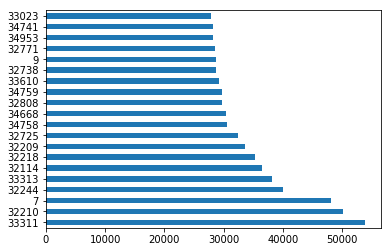

In [41]:
import scipy
import sklearn

%matplotlib inline
df_z_codes = df.ZIPCODE.value_counts()
df_z_codes = df_z_codes.nlargest(20)
df_z_codes.plot.barh()

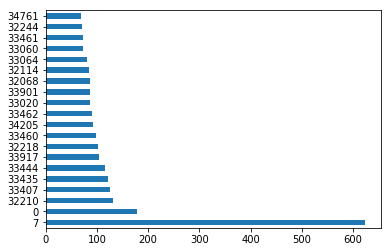

In [40]:
%matplotlib inline
df1_z_codes = df1.ZIPCODE.value_counts()
df1_z_codes = df1_z_codes.nlargest(20)
df1_z_codes.plot.barh()

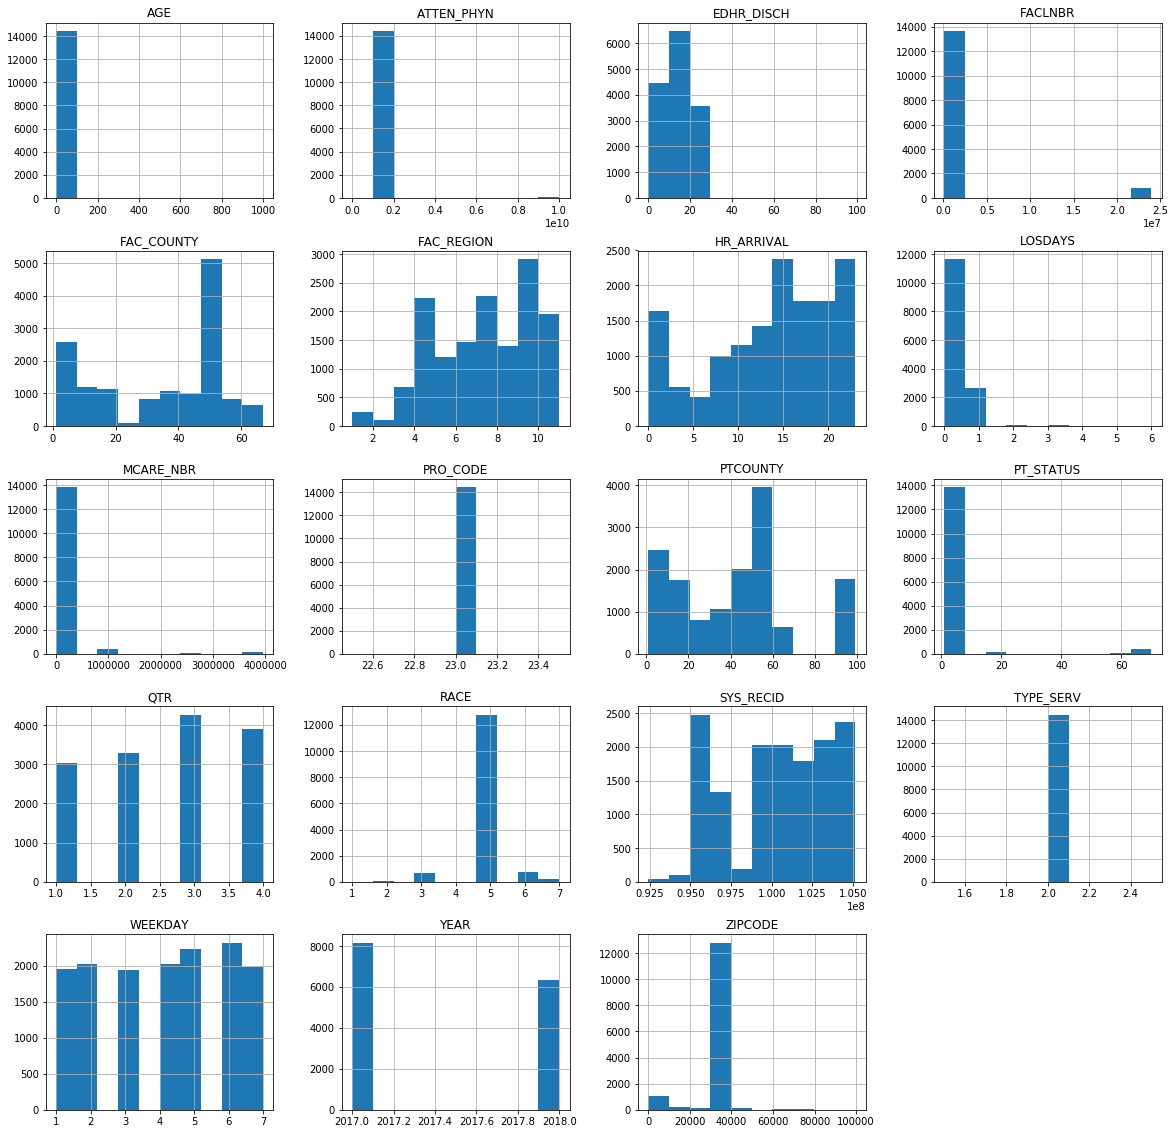

In [49]:
df1.hist(figsize = (20,20));


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.pairplot(df1, hue="ZIPCODE")
plt.show()
#scatter_matrix(df1, figsize=(5,5))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the dataset and conver to long-form
#flights_long = sns.load_dataset("flights")
encounters = df1.pivot("PTCOUNTY", "HR_ARRIVAL", "SYS_RECID")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(encounters, annot=True, fmt="d", linewidths=.5, ax=ax)

In [ ]:
df = df.YEAR.astype(int)

In [ ]:
print("There are", len(df.SYS_RECID), "patient accounts that have the pertinent dx")
print("There are", df.SYS_RECID.nunique(), "unique patient accounts that have the pertinent dx")
print("There are", df.FACLNBR.nunique(), "facilities represented")
print("There are", df.TYPE_SERV.nunique(), "service types")
print("There are", df.PRO_CODE.nunique(), "Pro Codes")
print("There are", df.FAC_REGION.nunique(),)

In [ ]:
#Subset of year, qtr, and facility number
df1 = df.loc[:,'YEAR':'FACLNBR']
df1.head()

In [ ]:
df1 = df1.astype(int)
df1.head(10)

In [ ]:
#df1.groupby(pd.Grouper(key='YEAR')).value_counts()[0].index.values[0]
pd.Grouper(key='YEAR')

In [ ]:
pd.Grouper?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


df1.plot.bar(color='C1', width=0.9);

In [ ]:
year_group = df1.groupby(['YEAR'])


In [ ]:
w = df['WEEKDAY']
w = pd.to_numeric(w)

In [ ]:
weekday = w.value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar?
plt.show

In [ ]:


yr = df['YEAR'].value_counts()


In [ ]:
df['SYS_RECID'].value_counts().hist()

In [ ]:
#Volume = who is coming in and how many?
#disposition = were they admitted/discharged
#times and days trends
#Particular area pts are coming from more
#Particular facility pts are going to more
#payer source

In [ ]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate)", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)